In [205]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error


In [224]:
CENTRE = 13000
STD    = 10000
NUM_SAMPLES = 400_000

# Target

count    400000.000000
mean      13945.675732
std        8692.177004
min           0.039007
25%        6989.422028
50%       13176.600063
75%       19819.656773
max       61570.795985
dtype: float64


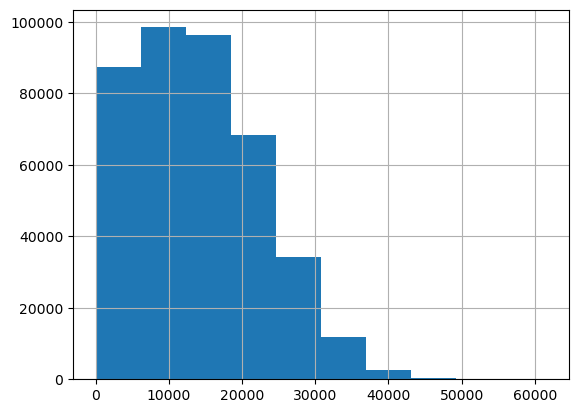

In [225]:
target = pd.Series(np.abs(np.random.normal(CENTRE, STD, NUM_SAMPLES))) # generate positive values
print(target.describe())
target.hist();

# Predict median

In [226]:
preds = pd.Series([target.median()]*target.shape[0])
preds.describe().round(1)

count    400000.0
mean      13176.6
std           0.0
min       13176.6
25%       13176.6
50%       13176.6
75%       13176.6
max       13176.6
dtype: float64

# MAPE test

In [234]:
def test(NUM_TO_EDIT):
    global NUM_SAMPLES
    MAPE_test = []
    for i in range(1,10):
        # edit first value in target dataset
        target.iloc[:NUM_TO_EDIT] = i
        MAPE_test += [mean_absolute_percentage_error(target, preds)]

    MAPE_test = pd.Series(MAPE_test, index=range(1,10))  
    MAPE_test.plot()
    plt.xlabel('Edited value of first target')
    plt.ylabel('MAPE')
    plt.show()
    print(MAPE_test.describe().round(3))
    print('\nRatio MAPE max/min', round(MAPE_test.max()/MAPE_test.min(), 3),
          '\nfor NUM_TO_EDIT =', NUM_TO_EDIT,
          '\nit\'s', round(NUM_TO_EDIT/NUM_SAMPLES*100, 3), '% of total samples count'
         )


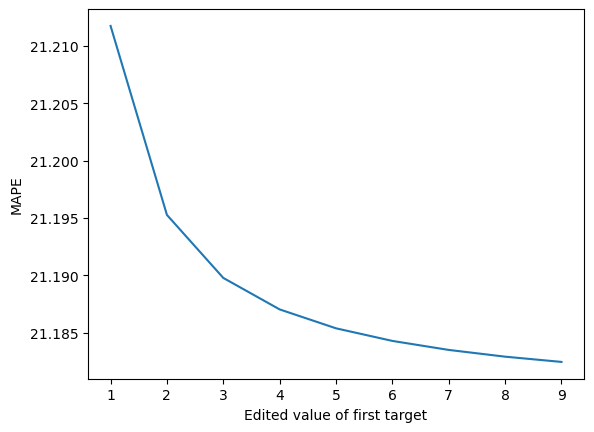

count     9.000
mean     21.189
std       0.009
min      21.182
25%      21.183
50%      21.185
75%      21.190
max      21.212
dtype: float64

Ratio MAPE max/min 1.001 
for NUM_TO_EDIT = 1 
it's 0.0 % of total samples count


In [235]:
test(1)

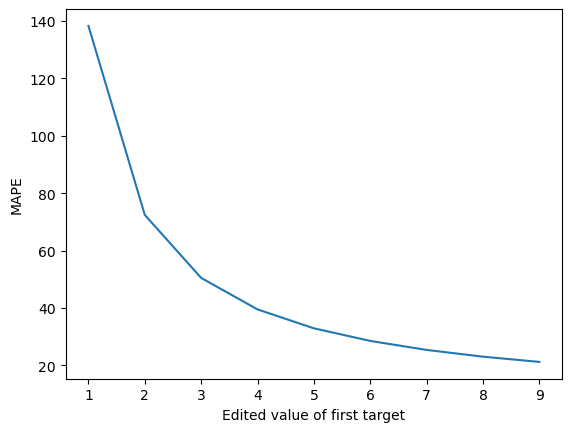

count      9.000
mean      47.960
std       37.575
min       21.182
25%       25.365
50%       32.895
75%       50.464
max      138.308
dtype: float64

Ratio MAPE max/min 6.529 
for NUM_TO_EDIT = 4000 
it's 1.0 % of total samples count


In [236]:
test(4000)